# Homework : 7 Machine Learning - 1 (Supervised Methods)

### Importing all necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans


In [2]:
# Helper fumnction to print the tablular representation.
def printTable(gamma_list, items, column_name):
    # Define the table dimensions
    num_rows = len(gamma_list) + 2
    num_cols = 2
    col_width1 = 15
    col_width2 = 24

    # Draw the table
    print('+' + '-'*(col_width1+2) + '+' + '-'*(col_width2+2) + '+')
    print(f"| {'Gamma'.ljust(col_width1)} | {column_name.ljust(col_width2)} |")
    print('+' + '-'*(col_width1+2) + '+' + '-'*(col_width2+2) + '+')
    for gamma, rmse in zip(gamma_list, items):
        print(f"| {str(gamma).ljust(col_width1)} | {str(rmse).ljust(col_width2)} |")
    print('+' + '-'*(col_width1+2) + '+' + '-'*(col_width2+2) + '+')

### Loading the dataset using numpy


In [3]:
X_train = np.load('./dataset/datasetA_X_train.npy')
X_test = np.load('./dataset/datasetA_X_test.npy')
y_train = np.load('./dataset/datasetA_y_train.npy')
y_test = np.load('./dataset/datasetA_y_test.npy')

In [4]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (4000, 2)
Shape of X_test: (2000, 2)


## 2] (a)

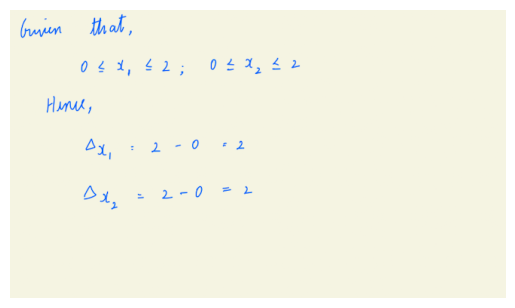

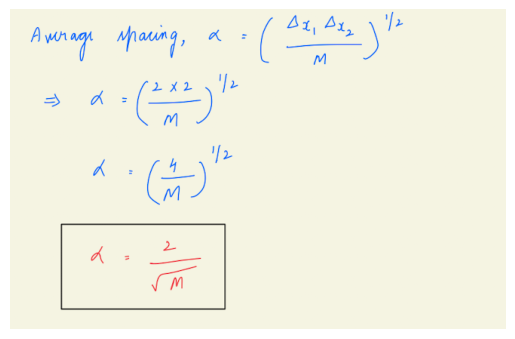

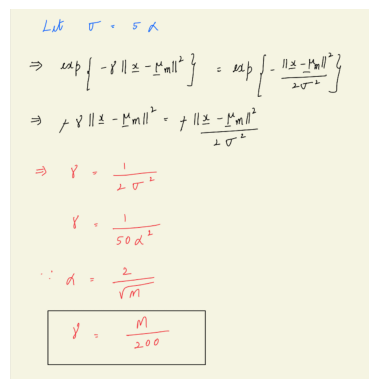

In [5]:
img = mpimg.imread('./Images/2a_one.png')
plt.imshow(img)
plt.axis('off')
plt.show()

img = mpimg.imread('./Images/2a_two.png')
plt.imshow(img)
plt.axis('off')
plt.show()

img = mpimg.imread('./Images/2a_three.png')
plt.imshow(img)
plt.axis('off')
plt.show()

## 2 (b) For comparison to the below systems, compute the RMSE of a trivial system that always outputs the sample mean value y on the training-set data.

In [6]:
y_mean = np.mean(y_train)
y_pred = np.copy(y_train)
y_pred = np.array([y_mean for y in y_train])

### 2] (b) RMSE of the Trivial System

In [7]:
rmse = mean_squared_error(y_train, y_pred, squared=False)
print(f"The Root Mean Squared Error is: {rmse}")

The Root Mean Squared Error is: 3.2035150890062902


### RMSE is 3.2035150890062902

## 2] (c) Choose the basis function centers as the data points: μm = xm , m = 1,2,!, N , in which N is the number of training data points during each fold in cross validation. For this part, the only hyperparameter to choose during model selection is γ.


In [8]:
# User-defined function to find the gamma value by passing the scale value from [0.01, 0.1, 1, 10, 100, 1000] and the M will be based on the 
# number of data-points in the current fold inside th for-loop.
def findGamma(scale, M):
    gamma = (scale * M) / 200
    return gamma

### 2] (c) i] Use MSE linear regression for the second layer, without regularization.

In [9]:
# Initializing the KFold as 4 and creating an instance for sklearn's KFold
kf = KFold(n_splits=4)

# Creating a list of gamma values
scaleList = [0.01, 0.1, 1, 10, 100, 1000]

In [10]:
mean_RMSE_train = []
std_RMSE_train = []

mean_RMSE_val = []
std_RMSE_val = []

for scale in scaleList:
    train_RMSE = []
    val_RMSE = []
    count = 0
    for train_index, val_index in kf.split(X_train):

        
        # Getting the folds of train and validation data one by one 4 times in this loop.
        # Basically X_train_fold will contain 3000 data-points in one iteration and X_val_fold will had the rest 1000 data-points.
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Performing non-linear transformation using the rbf_kernel in infinite dimensions and storing the transformed 
        # data-points in X_train_transformed. 
        X_train_transformed = rbf_kernel(X_train_fold, X_train_fold, gamma=findGamma(scale, len(X_train_fold)))
        X_val_transformed = rbf_kernel(X_val_fold, X_train_fold, gamma=findGamma(scale, len(X_train_fold)))


        # Instantiating the LinearRegression() class and creating an object linear_regressor.
        linear_regressor = LinearRegression()

        # Training the Linear Regression Model using the transformed data-points every fold.
        linear_regressor.fit(X_train_transformed, y_train_fold)

        # Making predictions and finding the RMSE value.
        y_pred_train_fold = linear_regressor.predict(X_train_transformed)
        rmse_tr = mean_squared_error(y_train_fold, y_pred_train_fold, squared=False)
        train_RMSE.append(rmse_tr)


        # Performing the same steps for the validation fold.
        y_pred_val_fold = linear_regressor.predict(X_val_transformed)
        rmse_val = mean_squared_error(y_val_fold, y_pred_val_fold, squared=False)
        val_RMSE.append(rmse_val)

        
        # print(f"Fold - {count + 1}  gamma: {findGamma(scale, len(X_train_fold))}")
        # print(train_RMSE)
        # print(val_RMSE)

        # count += 1
        # print()
    mean_RMSE_train.append(np.mean(np.array(train_RMSE)))
    std_RMSE_train.append(np.std(np.array(train_RMSE)))

    mean_RMSE_val.append(np.mean(np.array(val_RMSE)))
    std_RMSE_val.append(np.std(np.array(val_RMSE)))


    

### 2] (c) iii] Report on the cross validation RMSE for each value (c) or pair of values ((d) or (e)) tried, in 2 tables: one table for RMSE (mean over the 4 folds) and one table for RMSE (standard deviation over the 4 folds). 

### Tabular Representation of Mean RMSE values

In [11]:
printTable([findGamma(gamma, 3000) for gamma in scaleList], mean_RMSE_train, "Mean RMSE Train")
print()
printTable([findGamma(gamma, 3000) for gamma in scaleList], mean_RMSE_val, "Mean RMSE Val")

+-----------------+--------------------------+
| Gamma           | Mean RMSE Train          |
+-----------------+--------------------------+
| 0.15            | 1.0868751469897535       |
| 1.5             | 0.028192064976774445     |
| 15.0            | 3.127161418987823e-08    |
| 150.0           | 1.928418153651089e-12    |
| 1500.0          | 1.7348857708271595e-14   |
| 15000.0         | 1.452201992823574e-14    |
+-----------------+--------------------------+

+-----------------+--------------------------+
| Gamma           | Mean RMSE Val            |
+-----------------+--------------------------+
| 0.15            | 1.1314046066337953       |
| 1.5             | 0.03319331251953468      |
| 15.0            | 8.449796167385362e-07    |
| 150.0           | 0.0053178191604607156    |
| 1500.0          | 1.7583423636641806       |
| 15000.0         | 2.8682317947183837       |
+-----------------+--------------------------+


### Tabular Representation of Std RMSE values

In [12]:
printTable([findGamma(gamma, 3000) for gamma in scaleList], std_RMSE_train, "STD RMSE Train")
print()
printTable([findGamma(gamma, 3000) for gamma in scaleList], std_RMSE_val, "STD RMSE Val")

+-----------------+--------------------------+
| Gamma           | STD RMSE Train           |
+-----------------+--------------------------+
| 0.15            | 0.04714806346267406      |
| 1.5             | 0.00040685325793167416   |
| 15.0            | 9.978654400414821e-09    |
| 150.0           | 3.8608305022415494e-13   |
| 1500.0          | 1.6824874522002085e-15   |
| 15000.0         | 6.012693147960978e-16    |
+-----------------+--------------------------+

+-----------------+--------------------------+
| Gamma           | STD RMSE Val             |
+-----------------+--------------------------+
| 0.15            | 0.05047317452558111      |
| 1.5             | 0.0033024685834434713    |
| 15.0            | 7.55530225216978e-07     |
| 150.0           | 0.0033012769371201407    |
| 1500.0          | 0.35743811678160403      |
| 15000.0         | 0.04684454229686801      |
+-----------------+--------------------------+


### 2] (c) iii] Report the best mean value (or pair of values) found.
### The best mean value of the validation RMSE: 8.449796167385362e-07

### 2] (c) ii] Use model selection for finding a good value for γ. 
### Good value of the hyper-parameter gamma is 15.0

### 2] (c) iv] Plot training and validation RMSE vs. γ.

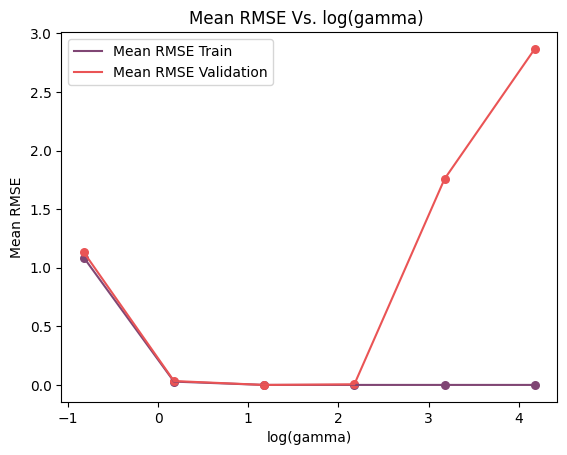

In [13]:
gamma_log = np.log10([findGamma(gamma, 3000) for gamma in scaleList])

ax = plt.axes()
ax.plot(gamma_log, mean_RMSE_train, label="Mean RMSE Train", color = "#804674")
ax.scatter(gamma_log, mean_RMSE_train, color = "#804674", marker='o', s = 30, alpha=1)

ax.plot(gamma_log, mean_RMSE_val, label="Mean RMSE Validation", color = "#EA5455")
ax.scatter(gamma_log, mean_RMSE_val, color = "#EA5455", marker='o', s = 30, alpha=1)

ax.set_ylabel('Mean RMSE')
ax.set_xlabel('log(gamma)')
ax.set_title("Mean RMSE Vs. log(gamma) ")
ax.legend(loc = 0, frameon = True)
plt.show()



### 2] (d) Randomly choose the basis function centers, without replacement, from the training-set data. Use number of basis function centers M varying from 30 to 300 (e.g., values 30, 60, 100, 300, 600). In this part you have 2 hyperparameters to find during model selection (γ and M ).

### 2] (d) i] Use MSE linear regression for the second layer, without regularization.

In [14]:
# List of possible basis function centers.
M = [30, 60, 100, 300, 600]

# Initializing the KFold as 4 and creating an instance for sklearn's KFold
kf = KFold(n_splits=4)

# Creating a list of gamma values
scaleList = [0.01, 0.1, 1, 10, 100, 1000]

mean_RMSE_bfc_train = []
std_RMSE_bfc_train = []

mean_RMSE_bfc_val = []
std_RMSE_bfc_val = []




for m in M:
    # This list will be made empty for every basis function center value m. 
    mean_RMSE_gamma_train = []
    std_RMSE_gamma_train = []

    mean_RMSE_gamma_val = []
    std_RMSE_gamma_val = []

    for scale in scaleList:
        # these arrays store the RMSE for every fold. So these arrays will have 4 values for every scale value.
        # For every scale value in scaleList, we make these lists empty lists because we iterate through the 4 folds one by one 
        train_RMSE = []
        val_RMSE = []
        count = 0
        for train_index, val_index in kf.split(X_train):

            # Getting the folds of train and validation data one by one 4 times in this loop.
            # Basically X_train_fold will contain 3000 data-points in one iteration and X_val_fold will had the rest 1000 data-points.
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]


            centerIndices = np.random.choice(X_train_fold.shape[0], size = m, replace = False)
            basisFuncCenters = X_train_fold[centerIndices]

            # Performing non-linear transformation using the rbf_kernel in infinite dimensions and storing the transformed 
            # data-points in X_train_transformed. 
            X_train_transformed = rbf_kernel(X_train_fold, basisFuncCenters, gamma=findGamma(scale, m))
            X_val_transformed = rbf_kernel(X_val_fold, basisFuncCenters, gamma=findGamma(scale, m))


            # Instantiating the LinearRegression() class and creating an object linear_regressor.
            linear_regressor = LinearRegression()

            # Training the Linear Regression Model using the transformed data-points every fold.
            linear_regressor.fit(X_train_transformed, y_train_fold)

            # Making predictions and finding the RMSE value.
            y_pred_train_fold = linear_regressor.predict(X_train_transformed)
            rmse_tr = mean_squared_error(y_train_fold, y_pred_train_fold, squared=False)
            train_RMSE.append(rmse_tr)


            # Performing the same steps for the validation fold.
            y_pred_val_fold = linear_regressor.predict(X_val_transformed)
            rmse_val = mean_squared_error(y_val_fold, y_pred_val_fold, squared=False)
            val_RMSE.append(rmse_val)

        mean_RMSE_gamma_train.append(np.mean(np.array(train_RMSE)))
        std_RMSE_gamma_train.append(np.std(np.array(train_RMSE)))

        mean_RMSE_gamma_val.append(np.mean(np.array(val_RMSE)))
        std_RMSE_gamma_val.append(np.std(np.array(val_RMSE)))


    mean_RMSE_bfc_train.append(mean_RMSE_gamma_train)
    std_RMSE_bfc_train.append(std_RMSE_gamma_train)

    mean_RMSE_bfc_val.append(mean_RMSE_gamma_val)
    std_RMSE_bfc_val.append(std_RMSE_gamma_val)

### Creating a dictionary of key = m and values = list of mean of RMSE values (or) values = list of std of RMSE values.

In [15]:
mean_RMSE_bfc_train_map = dict(zip(M, mean_RMSE_bfc_train))
std_RMSE_bfc_train_map = dict(zip(M, std_RMSE_bfc_train))

mean_RMSE_bfc_val_map = dict(zip(M, mean_RMSE_bfc_val))
std_RMSE_bfc_val_map = dict(zip(M, std_RMSE_bfc_val))

### 2] (d) iii] Report on the cross validation RMSE for each value (c) or pair of values ((d) or (e)) tried, in 2 tables: one table for RMSE (mean over the 4 folds) and one table for RMSE (standard deviation over the 4 folds).

### Printing the Tabular Representation of Mean and STD Value.

In [17]:
for m, mean_RMSE_gamma_val in mean_RMSE_bfc_val_map.items():
    print(f"m = {m}")
    printTable([findGamma(gamma, m) for gamma in scaleList], mean_RMSE_gamma_val, "Mean RMSE Val")
    print()

m = 30
+-----------------+--------------------------+
| Gamma           | Mean RMSE Val            |
+-----------------+--------------------------+
| 0.0015          | 4.715437036261309        |
| 0.015           | 1.948948718591237        |
| 0.15            | 1.6603193000926173       |
| 1.5             | 1.6091639751878826       |
| 15.0            | 1.7884678384010153       |
| 150.0           | 2.688934948496533        |
+-----------------+--------------------------+

m = 60
+-----------------+--------------------------+
| Gamma           | Mean RMSE Val            |
+-----------------+--------------------------+
| 0.003           | 2.2015182082183395       |
| 0.03            | 1.6477424871512572       |
| 0.3             | 1.1573506985561315       |
| 3.0             | 0.813169495044279        |
| 30.0            | 1.531850531111318        |
| 300.0           | 2.776652318521858        |
+-----------------+--------------------------+

m = 100
+-----------------+-----------------

In [18]:
for m, std_RMSE_gamma_val in std_RMSE_bfc_val_map.items():
    print(f"m = {m}")
    printTable([findGamma(gamma, m) for gamma in scaleList], std_RMSE_gamma_val, "STD RMSE Val")
    print()



m = 30
+-----------------+--------------------------+
| Gamma           | STD RMSE Val             |
+-----------------+--------------------------+
| 0.0015          | 1.421217018441914        |
| 0.015           | 0.02828313584108904      |
| 0.15            | 0.116208806245442        |
| 1.5             | 0.030355506189749203     |
| 15.0            | 0.2098646639340821       |
| 150.0           | 0.11479887859794236      |
+-----------------+--------------------------+

m = 60
+-----------------+--------------------------+
| Gamma           | STD RMSE Val             |
+-----------------+--------------------------+
| 0.003           | 0.13758152227366904      |
| 0.03            | 0.13911330256092586      |
| 0.3             | 0.009331984859444182     |
| 3.0             | 0.02413007034985364      |
| 30.0            | 0.12134843468194005      |
| 300.0           | 0.058977372802306575     |
+-----------------+--------------------------+

m = 100
+-----------------+-----------------

### 2] (d) iii] We can evidently see that for m = 600, gamma = 30, we get the minimum mean RMSE of 0.0030103679520871772

### 2] (d) ii] The optimized hyper-parameters are gamma = 30 amd M = 600

### 2] (d) iv] Plot training and validation RMSE vs. γ. (For parts (d) and (e), use your best value of M = M ∗ or K = 𝐾 ∗ for the plot.)

### Plotting Mean RMSE Validation Vs. log(Gamma)

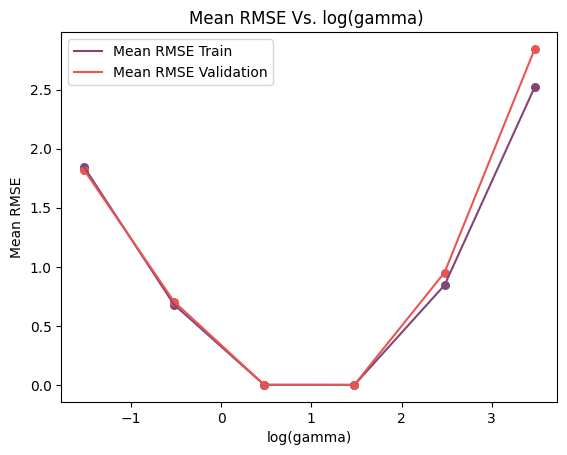

In [19]:
gamma_log = np.log10([findGamma(gamma, 600) for gamma in scaleList])

ax = plt.axes()
ax.plot(gamma_log, mean_RMSE_bfc_train_map[600], label="Mean RMSE Train", color = "#804674")
ax.scatter(gamma_log, mean_RMSE_bfc_train_map[600], color = "#804674", marker='o', s = 30, alpha=1)

ax.plot(gamma_log, mean_RMSE_bfc_val_map[600], label="Mean RMSE Validation", color = "#EA5455")
ax.scatter(gamma_log, mean_RMSE_bfc_val_map[600], color = "#EA5455", marker='o', s = 30, alpha=1)

ax.set_ylabel('Mean RMSE')
ax.set_xlabel('log(gamma)')
ax.set_title("Mean RMSE Vs. log(gamma) ")
ax.legend(loc = 0, frameon = True)
plt.show()



### 2] (d) v] If computational complexity were an issue, what is the smallest value of M or K (and its associated γ ) that would give RMSE at least a factor of 10 lower than the trivial system of (b)?
### The smallest value of M is 100 and associated gamma = 5.0 with a RMSE = 0.1827883907734456 that would give RMSE at least a factor of 10 lower than the trivial system. This is the RCC Model.

### What factor reduction in number of hidden units (dimensionality of the expanded feature space) from the original M=3000 in part (c) does this RCC model represent?
### The RCC model represents reduction of hidden units by a factor of 30.

### 2] (d) vi] For parts (d) and (e), plot in original 2D feature space, the training data points 𝑥& and the cluster centers μ' for your best values of hyperparameters. Then repeat the plots for your RCC model, and again for your lowest-complexity-model (M=30 or K=30). (Total of 3 plots for (d))

### Plot in original 2D feature space, the training data points 𝑥& and the cluster centers μ' for your best values of hyperparameters.

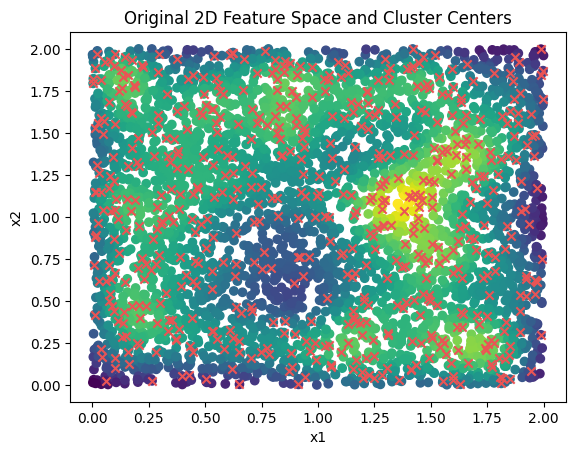

In [20]:
centerIndex = np.random.choice(X_train.shape[0], size = 600, replace = False)

basisFunctionCenters = X_train[centerIndex]

X_train_transformed = rbf_kernel(X_train, basisFunctionCenters, gamma=30)

plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c = X_train_transformed.sum(axis = 1))
plt.scatter(basisFunctionCenters[:, 0], basisFunctionCenters[:, 1], marker="x", c="#EA5455")
plt.title("Original 2D Feature Space and Cluster Centers")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Plot in original 2D feature space, the training data points 𝑥& and the cluster centers μ' for the RCC Model. (M = 100, gamma = 5.0 )

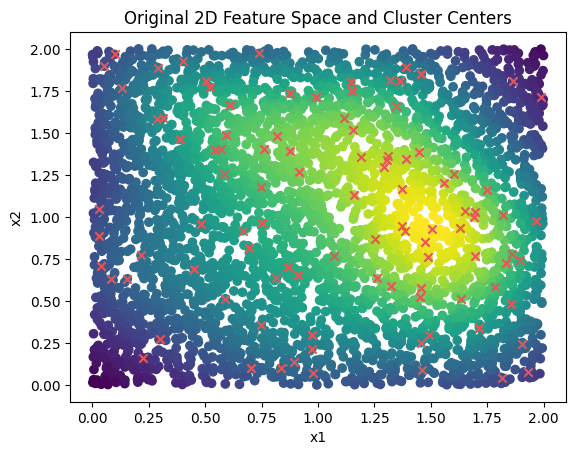

In [21]:
centerIndex = np.random.choice(X_train.shape[0], size = 100, replace = False)

basisFunctionCenters = X_train[centerIndex]

X_train_transformed = rbf_kernel(X_train, basisFunctionCenters, gamma=5.0)

plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c = X_train_transformed.sum(axis = 1))
plt.scatter(basisFunctionCenters[:, 0], basisFunctionCenters[:, 1], marker="x", c="#EA5455")
plt.title("Original 2D Feature Space and Cluster Centers")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Plot in original 2D feature space, the training data points 𝑥& and the cluster centers μ' for the lowest-complexity-model (M=30, gamma = 1.5)

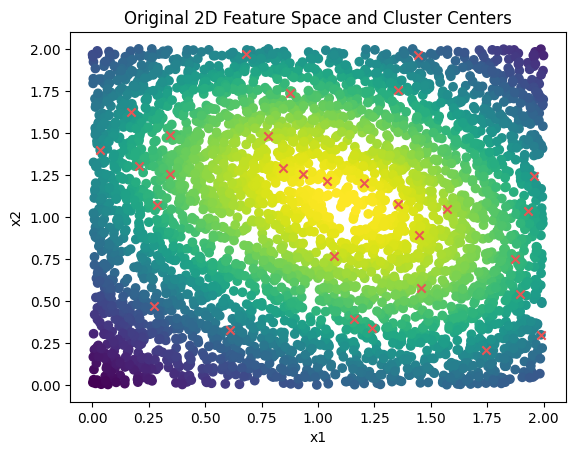

In [50]:
centerIndex = np.random.choice(X_train.shape[0], size = 30, replace = False)

basisFunctionCenters = X_train[centerIndex]

X_train_transformed = rbf_kernel(X_train, basisFunctionCenters, gamma=1.5)

plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c = X_train_transformed.sum(axis = 1))
plt.scatter(basisFunctionCenters[:, 0], basisFunctionCenters[:, 1], marker="x", c="#EA5455")
plt.title("Original 2D Feature Space and Cluster Centers")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 2] (d) vii]  Plot the validation error and its standard deviation Vs. the second hyperparameter (𝑀 for (d), K for (e)), using the best γ for each value of 𝑀 or K. (The value of best 𝛾 may depend on 𝑀 or K.)

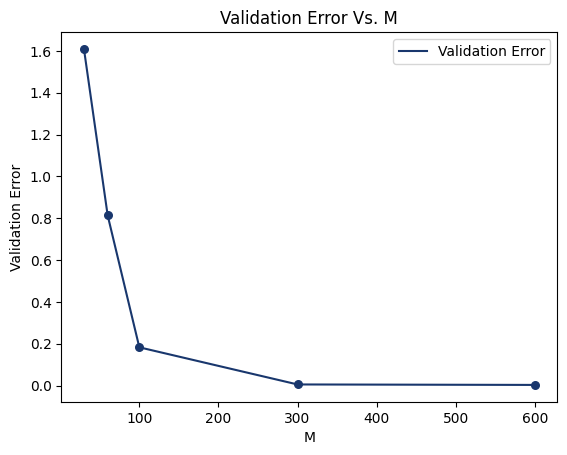

In [23]:
best_mean_rmse = []


for m, mean_RMSE_gamma_val in mean_RMSE_bfc_val_map.items():
    best_mean_rmse.append(np.min(np.array(mean_RMSE_gamma_val)))

ax = plt.axes()
ax.plot([m for m in M], best_mean_rmse, label="Validation Error", color = "#19376D")
ax.scatter([m for m in M], best_mean_rmse, color = "#19376D", marker='o', s = 30, alpha=1)

ax.set_ylabel('Validation Error')
ax.set_xlabel('M')
ax.set_title("Validation Error Vs. M")
ax.legend(loc = 0, frameon = True)
plt.show()
    

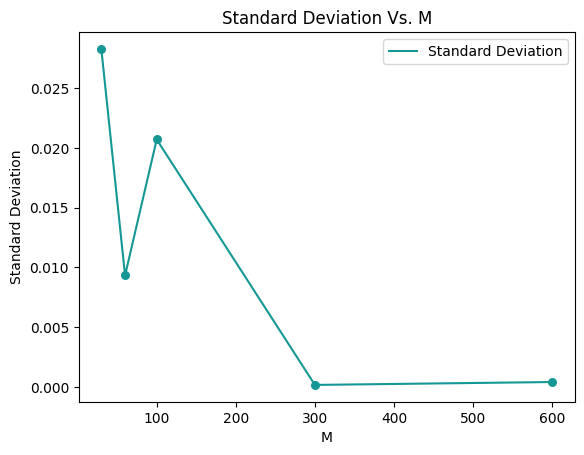

In [24]:
best_std_rmse = []

for m, std_RMSE_gamma_val in std_RMSE_bfc_val_map.items():
    best_std_rmse.append(np.min(np.array(std_RMSE_gamma_val)))


ax = plt.axes()

ax.plot([m for m in M], best_std_rmse, label="Standard Deviation", color = "#159895")
ax.scatter([m for m in M], best_std_rmse, color = "#159895", marker='o', s = 30, alpha=1)

ax.set_ylabel('Standard Deviation')
ax.set_xlabel('M')
ax.set_title("Standard Deviation Vs. M")
ax.legend(loc = 0, frameon = True)
plt.show()

## 2] (e) Use K-means clustering to choose basis function centers for a given K; vary K using model selection (e.g., use values 30, 60, 100, 300, 600). For each value of K, choose your initial cluster centers randomly (i.e., in sklearn’s K-means).

In [25]:
# List of possible basis function centers.
K = [30, 60, 100, 300, 600]

# Initializing the KFold as 4 and creating an instance for sklearn's KFold
kf = KFold(n_splits=4)

# Creating a list of gamma values
scaleList = [0.01, 0.1, 1, 10, 100, 1000]

mean_RMSE_bfc_train = []
std_RMSE_bfc_train = []

mean_RMSE_bfc_val = []
std_RMSE_bfc_val = []


for k in K:
    # This list will be made empty for every basis function center value m. 
    mean_RMSE_gamma_train = []
    std_RMSE_gamma_train = []

    mean_RMSE_gamma_val = []
    std_RMSE_gamma_val = []

    for scale in scaleList:
        # these arrays store the RMSE for every fold. So these arrays will have 4 values for every scale value.
        # For every scale value in scaleList, we make these lists empty lists because we iterate through the 4 folds one by one 
        train_RMSE = []
        val_RMSE = []
        count = 0
        for train_index, val_index in kf.split(X_train):

            # Getting the folds of train and validation data one by one 4 times in this loop.
            # Basically X_train_fold will contain 3000 data-points in one iteration and X_val_fold will had the rest 1000 data-points.
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]


            kmeans = KMeans(n_clusters=k, n_init = "auto", init="random")
            kmeans.fit(X_train_fold)

            basisFuncCenters = kmeans.cluster_centers_

            # Performing non-linear transformation using the rbf_kernel in infinite dimensions and storing the transformed 
            # data-points in X_train_transformed. 
            X_train_transformed = rbf_kernel(X_train_fold, basisFuncCenters, gamma=findGamma(scale, k))
            X_val_transformed = rbf_kernel(X_val_fold, basisFuncCenters, gamma=findGamma(scale, k))


            # Instantiating the LinearRegression() class and creating an object linear_regressor.
            linear_regressor = LinearRegression()

            # Training the Linear Regression Model using the transformed data-points every fold.
            linear_regressor.fit(X_train_transformed, y_train_fold)

            # Making predictions and finding the RMSE value.
            y_pred_train_fold = linear_regressor.predict(X_train_transformed)
            rmse_tr = mean_squared_error(y_train_fold, y_pred_train_fold, squared=False)
            train_RMSE.append(rmse_tr)


            # Performing the same steps for the validation fold.
            y_pred_val_fold = linear_regressor.predict(X_val_transformed)
            rmse_val = mean_squared_error(y_val_fold, y_pred_val_fold, squared=False)
            val_RMSE.append(rmse_val)

        mean_RMSE_gamma_train.append(np.mean(np.array(train_RMSE)))
        std_RMSE_gamma_train.append(np.std(np.array(train_RMSE)))

        mean_RMSE_gamma_val.append(np.mean(np.array(val_RMSE)))
        std_RMSE_gamma_val.append(np.std(np.array(val_RMSE)))


    mean_RMSE_bfc_train.append(mean_RMSE_gamma_train)
    std_RMSE_bfc_train.append(std_RMSE_gamma_train)

    mean_RMSE_bfc_val.append(mean_RMSE_gamma_val)
    std_RMSE_bfc_val.append(std_RMSE_gamma_val)

### Creating a dictionary of key = k and values = list of mean of RMSE values (or) values = list of std of RMSE values.

In [26]:
mean_RMSE_bfc_train_map = dict(zip(K, mean_RMSE_bfc_train))
std_RMSE_bfc_train_map = dict(zip(K, std_RMSE_bfc_train))

mean_RMSE_bfc_val_map = dict(zip(K, mean_RMSE_bfc_val))
std_RMSE_bfc_val_map = dict(zip(K, std_RMSE_bfc_val))

### 2] (e) iii] Report on the cross validation RMSE for each value (c) or pair of values ((d) or (e)) tried, in 2 tables: one table for RMSE (mean over the 4 folds) and one table for RMSE (standard deviation over the 4 folds).

### Printing the Tabular Representation of Mean and STD Value.

In [28]:
for k, mean_RMSE_gamma_val in mean_RMSE_bfc_val_map.items():
    print(f"k = {k}")
    printTable([findGamma(gamma, k) for gamma in scaleList], mean_RMSE_gamma_val, "Mean RMSE Val")
    print()

k = 30
+-----------------+--------------------------+
| Gamma           | Mean RMSE Val            |
+-----------------+--------------------------+
| 0.0015          | 2.781403014113983        |
| 0.015           | 2.5347499037566887       |
| 0.15            | 1.5140042461841028       |
| 1.5             | 1.6279207364444022       |
| 15.0            | 1.7186802314872114       |
| 150.0           | 2.853963161835545        |
+-----------------+--------------------------+

k = 60
+-----------------+--------------------------+
| Gamma           | Mean RMSE Val            |
+-----------------+--------------------------+
| 0.003           | 2.2913001902935104       |
| 0.03            | 1.7601490048119997       |
| 0.3             | 1.1788761966744619       |
| 3.0             | 0.8750528681062978       |
| 30.0            | 0.7191071334561288       |
| 300.0           | 2.735962285777041        |
+-----------------+--------------------------+

k = 100
+-----------------+-----------------

In [29]:
for k, std_RMSE_gamma_val in std_RMSE_bfc_val_map.items():
    print(f"k = {k}")
    printTable([findGamma(gamma, k) for gamma in scaleList], std_RMSE_gamma_val, "STD RMSE Val")
    print()



k = 30
+-----------------+--------------------------+
| Gamma           | STD RMSE Val             |
+-----------------+--------------------------+
| 0.0015          | 0.2960635706374978       |
| 0.015           | 0.4209720204923199       |
| 0.15            | 0.01755715268095187      |
| 1.5             | 0.03184952394169455      |
| 15.0            | 0.04488304739707133      |
| 150.0           | 0.024915442438118593     |
+-----------------+--------------------------+

k = 60
+-----------------+--------------------------+
| Gamma           | STD RMSE Val             |
+-----------------+--------------------------+
| 0.003           | 0.35602230092926107      |
| 0.03            | 0.13701607643903715      |
| 0.3             | 0.005871360806875238     |
| 3.0             | 0.027660201739291686     |
| 30.0            | 0.1751431098107133       |
| 300.0           | 0.05299801245676872      |
+-----------------+--------------------------+

k = 100
+-----------------+-----------------

### 2] (e) iii] We can evidently see that for k = 600, gamma = 30, we get the minimum mean RMSE of 0.002454457077742055 

### 2] (e)) ii] The optimized hyper-parameters are gamma = 30 amd K = 600

### 2] (e) iv] Plot training and validation RMSE vs. γ. (For parts (d) and (e), use your best value of M = M ∗ or K = 𝐾 ∗ for the plot.)

### Plotting Mean RMSE Validation Vs. log(Gamma)

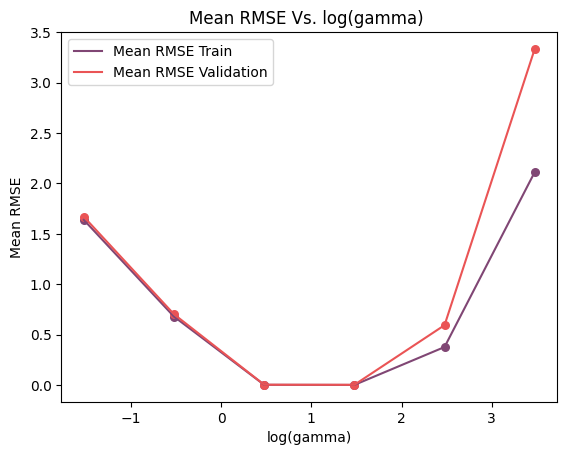

In [30]:
gamma_log = np.log10([findGamma(gamma, 600) for gamma in scaleList])

ax = plt.axes()
ax.plot(gamma_log, mean_RMSE_bfc_train_map[600], label="Mean RMSE Train", color = "#804674")
ax.scatter(gamma_log, mean_RMSE_bfc_train_map[600], color = "#804674", marker='o', s = 30, alpha=1)

ax.plot(gamma_log, mean_RMSE_bfc_val_map[600], label="Mean RMSE Validation", color = "#EA5455")
ax.scatter(gamma_log, mean_RMSE_bfc_val_map[600], color = "#EA5455", marker='o', s = 30, alpha=1)

ax.set_ylabel('Mean RMSE')
ax.set_xlabel('log(gamma)')
ax.set_title("Mean RMSE Vs. log(gamma) ")
ax.legend(loc = 0, frameon = True)
plt.show()



### 2] (e) v] If computational complexity were an issue, what is the smallest value of M or K (and its associated γ ) that would give RMSE at least a factor of 10 lower than the trivial system of (b)?
### The smallest value of K is 100 and associated gamma = 5.0 with a RMSE = 0.18762609464511065 that would give RMSE at least a factor of 10 lower than the trivial system. This is the RCC Model.

### What factor reduction in number of hidden units (dimensionality of the expanded feature space) from the original M=3000 in part (c) does this RCC model represent?
### The RCC model represents reduction of hidden units by a factor of 30.


### 2] (e) vi] For parts (d) and (e), plot in original 2D feature space, the training data points 𝑥& and the cluster centers μ' for your best values of hyperparameters. Then repeat the plots for your RCC model, and again for your lowest-complexity-model (M=30 or K=30). (Total of 3 plots for (d))

### Plot in original 2D feature space, the training data points 𝑥& and the cluster centers μ' for your best values of hyperparameters.

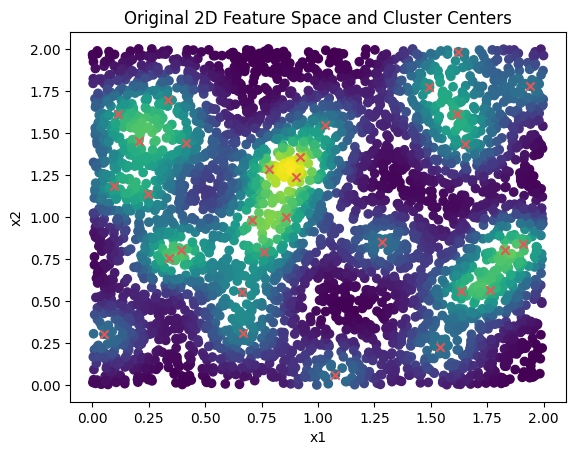

In [31]:
kmeans = KMeans(n_clusters=600, n_init = "auto", init="random")
kmeans.fit(X_train_fold)

basisFuncCenters = kmeans.cluster_centers_

X_train_transformed = rbf_kernel(X_train, basisFunctionCenters, gamma=30)

plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c = X_train_transformed.sum(axis = 1))
plt.scatter(basisFunctionCenters[:, 0], basisFunctionCenters[:, 1], marker="x", c="#EA5455")
plt.title("Original 2D Feature Space and Cluster Centers")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Plot in original 2D feature space, the training data points 𝑥& and the cluster centers μ' for the RCC Model. (K = 100, gamma = 5.0 )

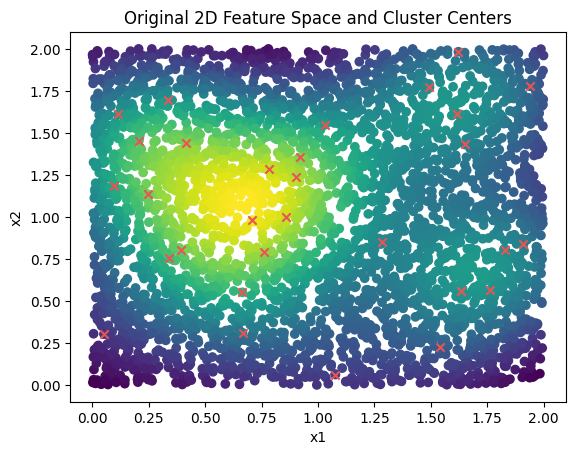

In [32]:
kmeans = KMeans(n_clusters=100, n_init = "auto", init="random")
kmeans.fit(X_train_fold)

basisFuncCenters = kmeans.cluster_centers_
X_train_transformed = rbf_kernel(X_train, basisFunctionCenters, gamma=5.0)

plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c = X_train_transformed.sum(axis = 1))
plt.scatter(basisFunctionCenters[:, 0], basisFunctionCenters[:, 1], marker="x", c="#EA5455")
plt.title("Original 2D Feature Space and Cluster Centers")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Plot in original 2D feature space, the training data points 𝑥& and the cluster centers μ' for the lowest-complexity-model (K=30, gamma = 0.15)

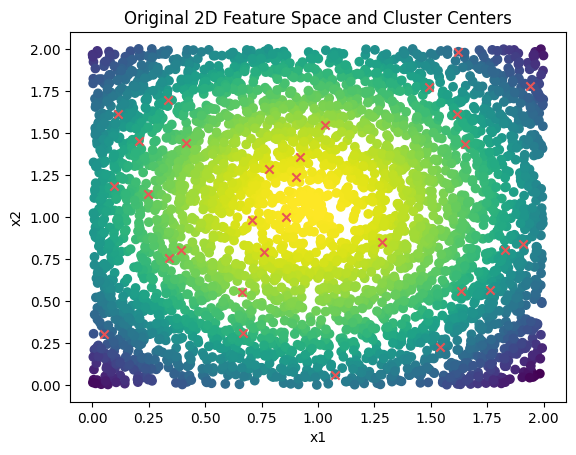

In [33]:
kmeans = KMeans(n_clusters=30, n_init = "auto", init="random")
kmeans.fit(X_train_fold)

basisFuncCenters = kmeans.cluster_centers_

X_train_transformed = rbf_kernel(X_train, basisFunctionCenters, gamma=0.15)

plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c = X_train_transformed.sum(axis = 1))
plt.scatter(basisFunctionCenters[:, 0], basisFunctionCenters[:, 1], marker="x", c="#EA5455")
plt.title("Original 2D Feature Space and Cluster Centers")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### 2] (e) vii]  Plot the validation error and its standard deviation Vs. the second hyperparameter (𝑀 for (d), K for (e)), using the best γ for each value of 𝑀 or K. (The value of best 𝛾 may depend on 𝑀 or K.)

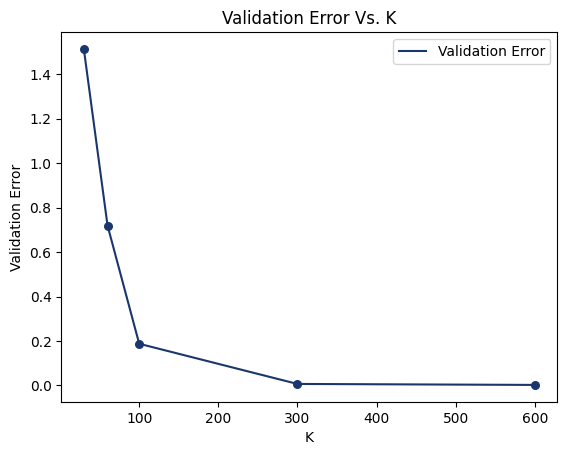

In [51]:
best_mean_rmse = []


for m, mean_RMSE_gamma_val in mean_RMSE_bfc_val_map.items():
    best_mean_rmse.append(np.min(np.array(mean_RMSE_gamma_val)))

ax = plt.axes()
ax.plot([m for m in M], best_mean_rmse, label="Validation Error", color = "#19376D")
ax.scatter([m for m in M], best_mean_rmse, color = "#19376D", marker='o', s = 30, alpha=1)

ax.set_ylabel('Validation Error')
ax.set_xlabel('K')
ax.set_title("Validation Error Vs. K")
ax.legend(loc = 0, frameon = True)
plt.show()
    

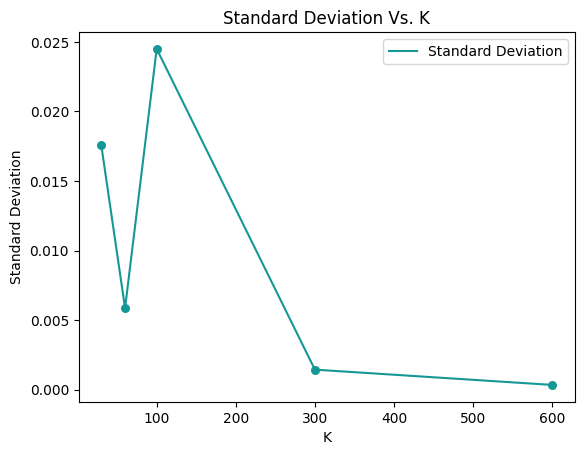

In [52]:
best_std_rmse = []

for k, std_RMSE_gamma_val in std_RMSE_bfc_val_map.items():
    best_std_rmse.append(np.min(np.array(std_RMSE_gamma_val)))


ax = plt.axes()

ax.plot([m for m in M], best_std_rmse, label="Standard Deviation", color = "#159895")
ax.scatter([m for m in M], best_std_rmse, color = "#159895", marker='o', s = 30, alpha=1)

ax.set_ylabel('Standard Deviation')
ax.set_xlabel('K')
ax.set_title("Standard Deviation Vs. K")
ax.legend(loc = 0, frameon = True)
plt.show()

### (f) Give the d.o.f. and number of constraints for the second layer (linear regressor) for each of (c), (d), and (e), for your best model of each; and again for your RCC model for each of (d), (e).

### For Cross-Validation

# BEST MODELS 
## c]
### D.O.F ==> 3001
### Constraints ==> 3000

## d]
# D.O.F ==> 601
# Constraints ==> 3000

## e]
### D.O.F ==> 601
### Constraints ==> 3000

# RCC MODELS ###

## d]
### D.O.F ==> 101
### Constraints ==> 3000

## e]
### D.O.F ==> 101
### Constraints ==> 3000

### (f) Give the d.o.f. and number of constraints for the second layer (linear regressor) for each of (c), (d), and (e), for your best model of each; and again for your RCC model for each of (d), (e).

### For Full Train Dataset

# BEST MODELS 
## c]
### D.O.F ==> 4001
### Constraints ==> 4000

## d]
# D.O.F ==> 601
# Constraints ==> 4000

## e]
### D.O.F ==> 601
### Constraints ==> 4000

# RCC MODELS ###

## d]
### D.O.F ==> 101
### Constraints ==> 4000

## e]
### D.O.F ==> 101
### Constraints ==> 4000

### (g) Run the best model from each of (c), (d), and (e); and run the RCC model of (d), (e), on your test set. Report the RMSE of each (5 models total).

### Best Model (c)

In [43]:
# Performing non-linear transformation using the rbf_kernel in infinite dimensions and storing the transformed 
# data-points in X_train_transformed. 
X_train_transformed = rbf_kernel(X_train, X_train, gamma=15)
X_test_transformed = rbf_kernel(X_test, X_train, gamma=15)

# Instantiating the LinearRegression() class and creating an object linear_regressor.
linear_regressor = LinearRegression()

# Training the Linear Regression Model using the transformed data-points every fold.
linear_regressor.fit(X_train_transformed, y_train)

y_pred_best = linear_regressor.predict(X_test_transformed)
rmse_test = mean_squared_error(y_pred_best, y_test, squared=False)
print(f"RMSE of Best Model (c) for Test Data is: {rmse_test}")

RMSE of Best Model (c) for Test Data is: 1.4204961473780364e-07


### Best Model (d)
        

In [45]:

centerIndices = np.random.choice(X_train.shape[0], size = 600, replace = False)
basisFuncCenters = X_train[centerIndices]

# Performing non-linear transformation using the rbf_kernel in infinite dimensions and storing the transformed 
# data-points in X_train_transformed. 
X_train_transformed = rbf_kernel(X_train, basisFuncCenters, gamma=30)
X_test_transformed = rbf_kernel(X_test, basisFuncCenters, gamma=30)

# Instantiating the LinearRegression() class and creating an object linear_regressor.
linear_regressor = LinearRegression()

# Training the Linear Regression Model using the transformed data-points every fold.
linear_regressor.fit(X_train_transformed, y_train)

y_pred_best = linear_regressor.predict(X_test_transformed)
rmse_test = mean_squared_error(y_pred_best, y_test, squared=False)
print(f"RMSE of Best Model (d) for Test Data is: {rmse_test}")

RMSE of Best Model (d) for Test Data is: 0.0020840503693903565


### Best Model (e)

In [46]:

kmeans = KMeans(n_clusters=600, n_init = "auto", init="random")
kmeans.fit(X_train_fold)

basisFuncCenters = kmeans.cluster_centers_


# Performing non-linear transformation using the rbf_kernel in infinite dimensions and storing the transformed 
# data-points in X_train_transformed. 
X_train_transformed = rbf_kernel(X_train, basisFuncCenters, gamma=30)
X_test_transformed = rbf_kernel(X_test, basisFuncCenters, gamma=30)

# Instantiating the LinearRegression() class and creating an object linear_regressor.
linear_regressor = LinearRegression()

# Training the Linear Regression Model using the transformed data-points every fold.
linear_regressor.fit(X_train_transformed, y_train)

y_pred_best = linear_regressor.predict(X_test_transformed)
rmse_test = mean_squared_error(y_pred_best, y_test, squared=False)
print(f"RMSE of Best Model (e) for Test Data is: {rmse_test}")

RMSE of Best Model (e) for Test Data is: 0.001717223606446779


### RCC Model (d)

In [47]:

centerIndices = np.random.choice(X_train.shape[0], size = 100, replace = False)
basisFuncCenters = X_train[centerIndices]

# Performing non-linear transformation using the rbf_kernel in infinite dimensions and storing the transformed 
# data-points in X_train_transformed. 
X_train_transformed = rbf_kernel(X_train, basisFuncCenters, gamma=5)
X_test_transformed = rbf_kernel(X_test, basisFuncCenters, gamma=5)

# Instantiating the LinearRegression() class and creating an object linear_regressor.
linear_regressor = LinearRegression()

# Training the Linear Regression Model using the transformed data-points every fold.
linear_regressor.fit(X_train_transformed, y_train)

y_pred_best = linear_regressor.predict(X_test_transformed)
rmse_test = mean_squared_error(y_pred_best, y_test, squared=False)
print(f"RMSE of RCC Model (d) for Test Data is: {rmse_test}")

RMSE of RCC Model (d) for Test Data is: 0.12617802459250077


### RCC Model (e)

In [48]:

kmeans = KMeans(n_clusters=100, n_init = "auto", init="random")
kmeans.fit(X_train_fold)

basisFuncCenters = kmeans.cluster_centers_


# Performing non-linear transformation using the rbf_kernel in infinite dimensions and storing the transformed 
# data-points in X_train_transformed. 
X_train_transformed = rbf_kernel(X_train, basisFuncCenters, gamma=5)
X_test_transformed = rbf_kernel(X_test, basisFuncCenters, gamma=5)

# Instantiating the LinearRegression() class and creating an object linear_regressor.
linear_regressor = LinearRegression()

# Training the Linear Regression Model using the transformed data-points every fold.
linear_regressor.fit(X_train_transformed, y_train)

y_pred_best = linear_regressor.predict(X_test_transformed)
rmse_test = mean_squared_error(y_pred_best, y_test, squared=False)
print(f"RMSE of RCC Model (e) for Test Data is: {rmse_test}")

RMSE of RCC Model (e) for Test Data is: 0.1603978481225234


## (h) Compare and comment on your results from (b)-(g). Specifically, observe and try to explain differences in performance for different values of M (or K) and 𝛾 during model selection.

(b) The trivial model outputs the sample mean of the y_train values. Hence, it gives the same y_pred for every single data-point. So, its RMSE will be very high and performance is very poor

For (c), using the entire data points as basis function centers resulted in the lowest RMSE value, however, it is computationally expensive.

For (d), randomly selecting m data points as the basis function centers resulted in a higher RMSE value than in (c), but it still outperformed the trivial system.

For (e), using K-means clustering to select k centers as the basis function centers resulted in similar results as (d).

Generally, increasing the number of basis function centers (M or K) leads to a decrease in RMSE values. Additionally, the mean RMSE decreases with an increase in gamma value, indicating better performance of the model. However, a gamma value that is too high can cause the model's performance to deteriorate.